In [1]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

In [3]:
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

from models import TADW, TriDnr, DeepWalk, Node2Vec, Hope, GCN_Model
from text_transformers import SBert, LDA, W2V, Sent2Vec, Doc2Vec, BOW, TFIDF
from datasets import Cora, CiteseerM10, Dblp
from task import VisTask

Using backend: pytorch


## Cora

In [4]:
cora = Cora()
gcn_task = VisTask(cora, TFIDF, GCN_Model, d=64, labels=True)
gcn_embeddings, gcn_labels = gcn_task.get_embeddings()
gcn_emb_2d = TSNE(n_components=2).fit_transform(gcn_embeddings)

Epoch 00000 | Time(s) nan | Loss 1.9444 | F1 0.3120 | ETputs(KTEPS) nan
Epoch 00001 | Time(s) nan | Loss 1.8637 | F1 0.3205 | ETputs(KTEPS) nan
Epoch 00002 | Time(s) nan | Loss 1.7712 | F1 0.3434 | ETputs(KTEPS) nan
Epoch 00003 | Time(s) 0.1292 | Loss 1.6751 | F1 0.3826 | ETputs(KTEPS) 102.66
Epoch 00004 | Time(s) 0.1343 | Loss 1.5758 | F1 0.4380 | ETputs(KTEPS) 98.74
Epoch 00005 | Time(s) 0.1334 | Loss 1.4855 | F1 0.5059 | ETputs(KTEPS) 99.42
Epoch 00006 | Time(s) 0.1344 | Loss 1.4060 | F1 0.6023 | ETputs(KTEPS) 98.67
Epoch 00007 | Time(s) 0.1335 | Loss 1.3119 | F1 0.6898 | ETputs(KTEPS) 99.37
Epoch 00008 | Time(s) 0.1343 | Loss 1.2196 | F1 0.7334 | ETputs(KTEPS) 98.74
Epoch 00009 | Time(s) 0.1342 | Loss 1.1252 | F1 0.7692 | ETputs(KTEPS) 98.84
Epoch 00010 | Time(s) 0.1345 | Loss 1.0444 | F1 0.7891 | ETputs(KTEPS) 98.60
Epoch 00011 | Time(s) 0.1340 | Loss 0.9499 | F1 0.8135 | ETputs(KTEPS) 98.99
Epoch 00012 | Time(s) 0.1341 | Loss 0.8870 | F1 0.8419 | ETputs(KTEPS) 98.88
Epoch 00013 |

In [8]:
cora = Cora()
tfidf_task = VisTask(cora, TFIDF, None, d=None, labels=False)
tfidf_embeddings, tfidf_labels = tfidf_task.get_embeddings()
tfidf_emb_2d = TSNE(n_components=2).fit_transform(tfidf_embeddings)

In [10]:
cora = Cora()
sent2vec_task = VisTask(cora, lambda: Sent2Vec(train=True, d=64), None, d=None, labels=False)
sent2vec_embeddings, sent2vec_labels = sent2vec_task.get_embeddings()
sent2vec_emb_2d = TSNE(n_components=2).fit_transform(sent2vec_embeddings)

In [11]:
cora = Cora()
deepwalk_task = VisTask(cora, None, DeepWalk, d=100, labels=False)
deepwalk_embeddings, deepwalk_labels = deepwalk_task.get_embeddings()
deepwalk_emb_2d = TSNE(n_components=2).fit_transform(deepwalk_embeddings)

In [16]:
cora = Cora()
tridnr_task = VisTask(cora, None, TriDnr, d=160, labels=True)
tridnr_embeddings, tridnr_labels = tridnr_task.get_embeddings()
tridnr_emb_2d = TSNE(n_components=2).fit_transform(tridnr_embeddings)

In [17]:
cora = Cora()
tadw_task = VisTask(cora, TFIDF, TADW, d=160, labels=True)
tadw_embeddings, tadw_labels = tadw_task.get_embeddings()
tadw_emb_2d = TSNE(n_components=2).fit_transform(tadw_embeddings)

Iteration  0
Iteration  1
Iteration  2
Iteration  3
Iteration  4
Iteration  5
Iteration  6
Iteration  7
Iteration  8
Iteration  9
Iteration  10
Iteration  11
Iteration  12
Iteration  13
Iteration  14
Iteration  15
Iteration  16
Iteration  17
Iteration  18
Iteration  19


In [20]:
cora = Cora()
tadw_sent2vec_task = VisTask(cora, lambda: Sent2Vec(train=True, d=64), TADW, d=160, labels=True)
tadw_sent2vec_embeddings, tadw_sent2vec_labels = tadw_task.get_embeddings()
tadw_sent2vec_emb_2d = TSNE(n_components=2).fit_transform(tadw_sent2vec_embeddings)

Iteration  0
Iteration  1
Iteration  2
Iteration  3
Iteration  4
Iteration  5
Iteration  6
Iteration  7
Iteration  8
Iteration  9
Iteration  10
Iteration  11
Iteration  12
Iteration  13
Iteration  14
Iteration  15
Iteration  16
Iteration  17
Iteration  18
Iteration  19


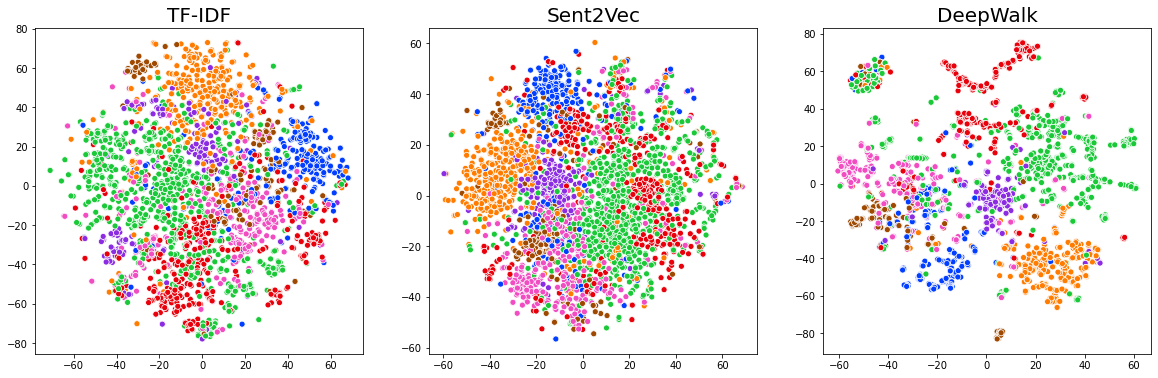

In [32]:
plt.figure(figsize=(20, 6))
ax1 = plt.subplot(1, 3, 1)
ax1.set_title('TF-IDF', fontsize=20)
sns.scatterplot(tfidf_emb_2d[:,0], tfidf_emb_2d[:,1], hue=tfidf_labels, palette='bright', legend=False)
ax2 = plt.subplot(1, 3, 2)
ax2.set_title('Sent2Vec', fontsize=20)
sns.scatterplot(sent2vec_emb_2d[:,0], sent2vec_emb_2d[:,1], hue=sent2vec_labels, palette='bright', legend=False)
ax3 = plt.subplot(1, 3, 3)
ax3.set_title('DeepWalk', fontsize=20)
sns.scatterplot(deepwalk_emb_2d[:,0], deepwalk_emb_2d[:,1], hue=deepwalk_labels, palette='bright', legend=False)
plt.show()

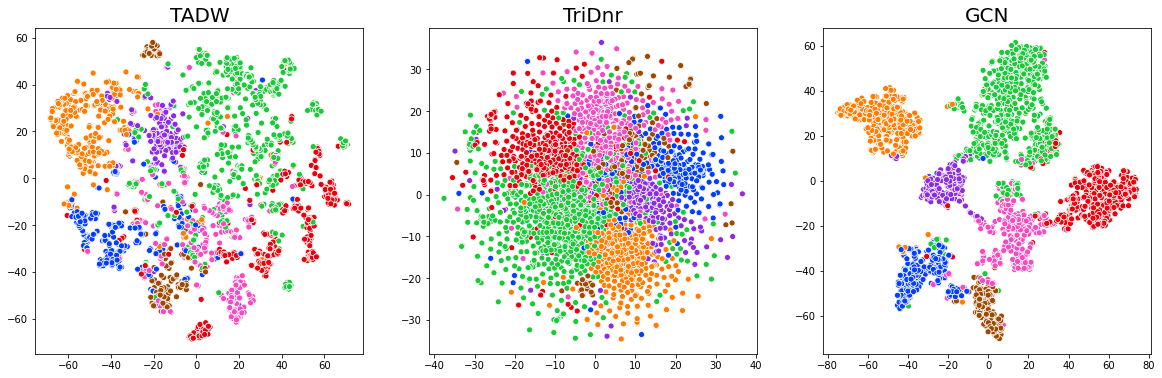

In [33]:
plt.figure(figsize=(20, 6))
ax1 = plt.subplot(1, 3, 1)
ax1.set_title('TADW', fontsize=20)
sns.scatterplot(tadw_emb_2d[:,0], tadw_emb_2d[:,1], hue=tadw_labels, palette='bright', legend=False)
ax2 = plt.subplot(1, 3, 2)
ax2.set_title('TriDnr', fontsize=20)
sns.scatterplot(tridnr_emb_2d[:,0], tridnr_emb_2d[:,1], hue=tridnr_labels, palette='bright', legend=False)
ax3 = plt.subplot(1, 3, 3)
ax3.set_title('GCN', fontsize=20)
sns.scatterplot(gcn_emb_2d[:,0], gcn_emb_2d[:,1], hue=gcn_labels, palette='bright', legend=False)
plt.show()

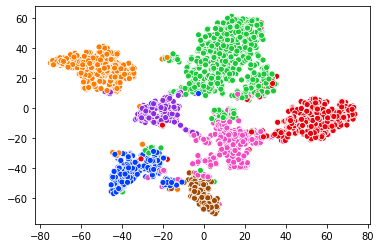

In [7]:
sns.scatterplot(gcn_emb_2d[:,0], gcn_emb_2d[:,1], hue=gcn_labels, palette='bright', legend=False)
plt.show()

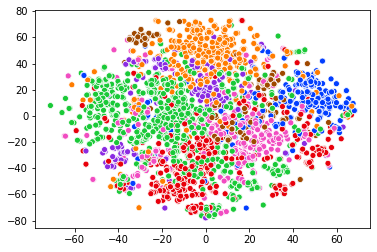

In [9]:
sns.scatterplot(tfidf_emb_2d[:,0], tfidf_emb_2d[:,1], hue=tfidf_labels, palette='bright', legend=False)
plt.show()

In [28]:
sns.scatterplot(sent2vec_emb_2d[:,0], sent2vec_emb_2d[:,1], hue=sent2vec_labels, palette='bright', legend=False)

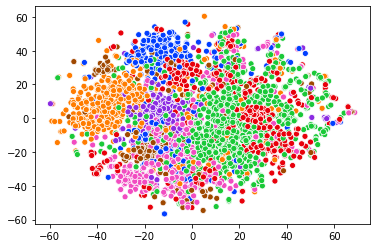

In [12]:
sns.scatterplot(sent2vec_emb_2d[:,0], sent2vec_emb_2d[:,1], hue=sent2vec_labels, palette='bright', legend=False)

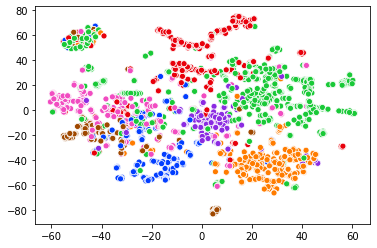

In [13]:
sns.scatterplot(deepwalk_emb_2d[:,0], deepwalk_emb_2d[:,1], hue=deepwalk_labels, palette='bright', legend=False)

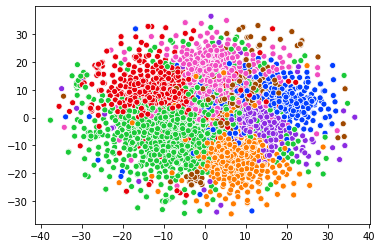

In [18]:
sns.scatterplot(tridnr_emb_2d[:,0], tridnr_emb_2d[:,1], hue=tridnr_labels, palette='bright', legend=False)

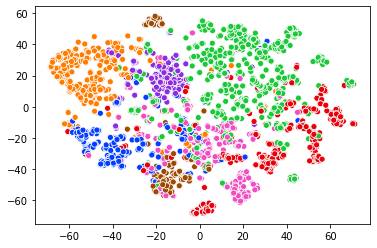

In [19]:
sns.scatterplot(tadw_emb_2d[:,0], tadw_emb_2d[:,1], hue=tadw_labels, palette='bright', legend=False)

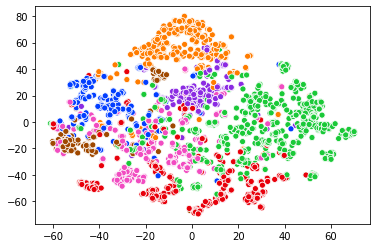

In [21]:
sns.scatterplot(tadw_sent2vec_emb_2d[:,0], tadw_sent2vec_emb_2d[:,1], hue=tadw_sent2vec_labels, palette='bright', legend=False)

In [15]:
plt.scatter(sent2vec_emb_2d[:,0], sent2vec_emb_2d[:,1])

In [12]:
sent2vec_emb_2d

array([[-51.04307  , -25.154575 ],
       [-37.309246 , -15.196886 ],
       [-34.38527  ,  21.191063 ],
       ...,
       [  5.3178277, -24.241343 ],
       [ -3.4431748,   5.1534624],
       [ -7.097526 , -15.926288 ]], dtype=float32)

In [18]:
gcn_labels

array([1, 2, 1, ..., 2, 2, 2])